In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.options.display.max_columns=None

In [4]:
pd.options.display.float_format = '{:.3f}'.format

In [5]:
concatenado_unidades = pd.read_parquet('/content/drive/MyDrive/Cópia arquivos Python+TCC/4 BACTÉRIAS SELECIONADAS.parquet')
concatenado_unidades

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,30.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6360,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,16.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6363,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,0.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6422,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,52.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Aphanocapsa sp. = 261 classe 1 (3,93%)

## *Início*

In [6]:
df_aphanocapsa = concatenado_unidades[concatenado_unidades['Unidade']=='Aphanocapsa sp.']
df_aphanocapsa.describe()

,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
count,6966.000,4576.000,2955.000,6262.000,6698.000,6568.000,6307.000,1444.000,3419.000,6483.000,2657.000,2941.000,3631.000,1839.000,3130.000,3110.000,3408.000,2818.000,6966.000
mean,6158.880,0.109,0.710,27.127,25.072,7.244,37.169,409.252,4.240,7.279,222.154,152.865,280.729,1.604,0.719,35.427,0.141,14.744,0.042
std,55551.716,0.316,3.401,4.958,5.211,1.636,145.395,4191.400,10.584,5.395,1091.319,2566.634,2171.323,2.419,3.023,518.711,0.390,164.032,0.200
min,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.200,25.000,22.420,6.790,4.545,47.175,2.000,6.150,60.000,9.000,50.000,1.000,0.100,0.050,0.020,1.000,0.000
50%,0.000,0.000,0.280,27.800,25.640,7.220,11.280,73.400,2.100,7.200,96.000,38.000,72.700,1.000,0.249,0.300,0.040,1.670,0.000
75%,60.000,0.000,0.500,30.000,28.200,7.700,28.000,100.400,3.000,8.000,181.000,50.000,132.000,1.300,0.400,0.800,0.110,5.100,0.000
max,1684671.000,2.000,77.000,42.900,265.000,83.400,8600.000,73400.000,465.000,117.100,40753.000,100000.000,47342.000,32.400,62.200,21450.000,11.000,8339.760,1.000


In [7]:
df_aphanocapsa['Classe'].value_counts()

,count
Classe,
0,6675
1,291


In [8]:
df_aphanocapsa['Choveu'].value_counts()

,count
Choveu,
0.000,4081
1.000,489
2.000,6


In [ ]:
#df_aphanocapsa = df_aphanocapsa[df_aphanocapsa['Choveu']!=2]

In [9]:
df_aphanocapsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6966 entries, 49 to 7
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Região Geográfica                   6966 non-null   object 
 1   UF                                  6966 non-null   object 
 2   Município                           6966 non-null   object 
 3   Date_x                              6966 non-null   object 
 4   Nome do manancial superficial       6966 non-null   object 
 5   Categoria do manancial superficial  6966 non-null   object 
 6   Unidade                             6966 non-null   object 
 7   Resultado                           6966 non-null   float64
 8   Choveu                              4576 non-null   float64
 9   Profundidade                        2955 non-null   float64
 10  TempAr                              6262 non-null   float64
 11  TempAmostra                         6698 non-null 

In [10]:
df_aphanocapsa.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0


In [11]:
# ESTAÇÕES DO ANO

# Converte a coluna Date_x para datetime
df_aphanocapsa['Date_x'] = pd.to_datetime(df_aphanocapsa['Date_x'])

# Tabela com as datas de início das estações do ano (hemisfério sul)
estacoes_inicio = {
    2014: {'Verao': '2013-12-21', 'Outono': '2014-03-20', 'Inverno': '2014-06-21', 'Primavera': '2014-09-23'},
    2015: {'Verao': '2014-12-21', 'Outono': '2015-03-20', 'Inverno': '2015-06-21', 'Primavera': '2015-09-23'},
    2016: {'Verao': '2015-12-22', 'Outono': '2016-03-20', 'Inverno': '2016-06-20', 'Primavera': '2016-09-22'},
    2017: {'Verao': '2016-12-21', 'Outono': '2017-03-20', 'Inverno': '2017-06-21', 'Primavera': '2017-09-22'},
    2018: {'Verao': '2017-12-21', 'Outono': '2018-03-20', 'Inverno': '2018-06-21', 'Primavera': '2018-09-22'},
    2019: {'Verao': '2018-12-21', 'Outono': '2019-03-20', 'Inverno': '2019-06-21', 'Primavera': '2019-09-23'},
    2020: {'Verao': '2019-12-22', 'Outono': '2020-03-20', 'Inverno': '2020-06-20', 'Primavera': '2020-09-22'},
    2021: {'Verao': '2020-12-21', 'Outono': '2021-03-20', 'Inverno': '2021-06-21', 'Primavera': '2021-09-22'},
    2022: {'Verao': '2021-12-21', 'Outono': '2022-03-20', 'Inverno': '2022-06-21', 'Primavera': '2022-09-23'},
    2023: {'Verao': '2022-12-21', 'Outono': '2023-03-20', 'Inverno': '2023-06-21', 'Primavera': '2023-09-23'}
}

# Função para determinar a estação do ano
def get_season(date):
    year = date.year
    start_dates = estacoes_inicio.get(year, None)
    if not start_dates:
        return None  # Se o ano não estiver na tabela, retorne None

    verao = pd.Timestamp(start_dates['Verao'])
    outono = pd.Timestamp(start_dates['Outono'])
    inverno = pd.Timestamp(start_dates['Inverno'])
    primavera = pd.Timestamp(start_dates['Primavera'])

    if verao <= date < outono:
        return 'Verao'
    elif outono <= date < inverno:
        return 'Outono'
    elif inverno <= date < primavera:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplica a função para criar uma coluna com a estação
df_aphanocapsa['Estacao'] = df_aphanocapsa['Date_x'].apply(get_season)

# Cria colunas binárias para cada estação
df_aphanocapsa['Verao'] = (df_aphanocapsa['Estacao'] == 'Verao').astype(int)
df_aphanocapsa['Outono'] = (df_aphanocapsa['Estacao'] == 'Outono').astype(int)
df_aphanocapsa['Inverno'] = (df_aphanocapsa['Estacao'] == 'Inverno').astype(int)
df_aphanocapsa['Primavera'] = (df_aphanocapsa['Estacao'] == 'Primavera').astype(int)

# Remove a coluna intermediária de estação, se não for mais necessária
df_aphanocapsa.drop(columns=['Estacao'], inplace=True)

# Visualizar o resultado
df_aphanocapsa.head(5)

<ipython-input-11-9c301a3f4d10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aphanocapsa['Date_x'] = pd.to_datetime(df_aphanocapsa['Date_x'])
<ipython-input-11-9c301a3f4d10>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aphanocapsa['Estacao'] = df_aphanocapsa['Date_x'].apply(get_season)
<ipython-input-11-9c301a3f4d10>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0,0,0,0,1
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0,0,0,0,1
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0,0,0,0,1


In [12]:
df_aphanocapsa.head(10)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0,0,0,0,1
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0,0,0,0,1
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0,0,0,0,1
81,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,17.000,21.570,6.510,69.000,32.800,3.000,6.180,NaN,156.000,90.000,NaN,0.360,1.490,0.606,NaN,0,0,0,0,1
116,SUL,RS,CAMPO BOM,2019-11-20,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.500,27.000,21.930,7.140,18.780,NaN,NaN,6.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
145,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
158,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
208,SUL,RS,SAO LEOPOLDO,2016-11-08,RIO DOS SINOS,rio,Aphanocapsa sp.,30.000,0.000,0.500,26.000,20.400,6.940,34.000,60.900,NaN,6.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [13]:
# DELTA DE TEMPERATURA AR - TEMPERATURA AGUA (DELTA T)

df_aphanocapsa['Delta T'] = df_aphanocapsa['TempAr'] - df_aphanocapsa['TempAmostra']
df_aphanocapsa['Delta T']

<ipython-input-13-a69eadc045bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aphanocapsa['Delta T'] = df_aphanocapsa['TempAr'] - df_aphanocapsa['TempAmostra']


,Delta T
49,8.500
50,5.600
78,-3.090
79,-3.160
80,-2.550
...,...
6424,-4.270
6444,-0.400
6445,-0.520
3,-1.050


In [14]:
df_aphanocapsa.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [15]:
features_possiveis_aphanocapsa = ['Choveu', 'Profundidade', 'TempAr', 'TempAmostra', 'pH', 'Turbidez','CondutividadeEletrica', 'DBO', 'OD', 'SolTotais', 'SolSuspensaoTotais',
                            'SolDissolvidosTotais', 'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal', 'Clorofila', 'Primavera','Verao',
                            'Outono','Inverno', 'Verao', 'Outono', 'Inverno', 'Primavera','Delta T']
output_micro = 'Classe'

len(features_possiveis_aphanocapsa)

26

In [16]:
df_aphanocapsa_c1 = df_aphanocapsa[df_aphanocapsa['Classe']==1]
df_aphanocapsa_c0 = df_aphanocapsa[df_aphanocapsa['Classe']==0]

In [17]:
df_aphanocapsa_c1.describe()

,Date_x,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera,Delta T
count,291,291.000,162.000,78.000,280.000,278.000,277.000,261.000,63.000,196.000,272.000,151.000,178.000,223.000,95.000,197.000,198.000,212.000,203.000,291.000,291.000,291.000,291.000,291.000,278.000
mean,2018-11-10 23:15:27.835051520,127769.447,0.080,0.274,28.204,27.911,8.034,32.102,3329.314,7.234,7.560,504.546,367.703,1391.577,2.301,1.142,0.426,0.318,48.996,1.000,0.237,0.285,0.244,0.234,0.325
min,2016-10-04 00:00:00,20000.000,0.000,0.000,0.500,16.140,2.080,0.000,17.700,0.000,1.100,29.000,0.400,24.000,0.112,0.000,0.000,0.007,0.100,1.000,0.000,0.000,0.000,0.000,-28.280
25%,2018-03-13 00:00:00,25025.000,0.000,0.200,26.900,26.472,7.230,3.400,82.950,3.000,5.867,107.000,7.050,126.000,1.000,0.200,0.082,0.030,2.100,1.000,0.000,0.000,0.000,0.000,-1.000
50%,2018-06-18 00:00:00,41785.000,0.000,0.300,29.000,28.240,7.750,9.750,343.000,4.200,7.320,194.000,22.000,220.000,1.000,0.330,0.300,0.130,7.500,1.000,0.000,0.000,0.000,0.000,0.600
75%,2019-04-06 00:00:00,102760.000,0.000,0.300,31.000,29.975,8.410,23.500,503.350,8.350,8.800,309.000,50.000,347.500,2.324,0.440,0.600,0.500,26.860,1.000,0.000,1.000,0.000,0.000,3.000
max,2023-11-22 00:00:00,1684671.000,1.000,1.180,42.800,34.700,83.400,1010.000,69600.000,53.500,20.300,31790.000,59400.000,47342.000,21.300,52.200,3.500,4.900,965.000,1.000,1.000,1.000,1.000,1.000,10.600
std,NaN,241811.133,0.273,0.141,5.992,3.081,4.633,86.570,13556.949,8.725,2.962,2596.639,4449.867,6246.890,2.917,5.352,0.529,0.544,124.005,0.000,0.426,0.452,0.430,0.424,5.565


In [18]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_aphanocapsa_c1.isnull().sum() / len(df_aphanocapsa_c1)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_aphanocapsa_c1_perc = pd.DataFrame({
    "Feature": df_aphanocapsa_c1.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_aphanocapsa_c1_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,78.351
9,Profundidade,73.196
20,NitrogenioTotal,67.354
17,SolTotais,48.110
8,Choveu,44.330
18,SolSuspensaoTotais,38.832
15,DBO,32.646
21,NitrogenioAmoniacal,32.302
22,Nitratos,31.959
24,Clorofila,30.241


In [19]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_aphanocapsa_c0.isnull().sum() / len(df_aphanocapsa_c0)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_aphanocapsa_c0_perc = pd.DataFrame({
    "Feature": df_aphanocapsa_c0.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_aphanocapsa_c0_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,79.311
20,NitrogenioTotal,73.873
17,SolTotais,62.457
24,Clorofila,60.824
18,SolSuspensaoTotais,58.607
9,Profundidade,56.899
22,Nitratos,56.375
21,NitrogenioAmoniacal,56.060
23,FosforoTotal,52.120
15,DBO,51.715


In [20]:
df_aphanocapsa.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [21]:
colunas_50_manter = df_aphanocapsa_c1_perc[df_aphanocapsa_c1_perc['Porcentagem (%)']<=50]

colunas_50_manter = colunas_50_manter.sort_values(by='Porcentagem (%)', ascending=False)['Feature']
colunas_50_manter.reset_index(drop=True).head(28)

,Feature
0,SolTotais
1,Choveu
2,SolSuspensaoTotais
3,DBO
4,NitrogenioAmoniacal
5,Nitratos
6,Clorofila
7,FosforoTotal
8,SolDissolvidosTotais
9,Turbidez


In [22]:
df_aphanocapsa_50 = df_aphanocapsa[colunas_50_manter.head(28)]
df_aphanocapsa_50.head(5)

,SolTotais,Choveu,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,UF,Resultado,Unidade,Categoria do manancial superficial,Nome do manancial superficial,Date_x,Município,Classe,Verao,Outono,Inverno,Primavera,Região Geográfica
49,NaN,0.000,10.000,2.000,0.110,NaN,NaN,0.062,36.000,57.000,10.210,6.460,8.500,12.500,21.000,RS,0.000,Aphanocapsa sp.,rio,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
50,NaN,0.000,10.000,2.000,0.195,NaN,NaN,0.116,98.000,5.000,8.400,7.150,5.600,20.300,25.900,RS,0.000,Aphanocapsa sp.,rio,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
78,NaN,1.000,150.000,7.000,0.862,0.870,NaN,0.575,65.000,71.000,5.870,6.780,-3.090,21.090,18.000,RS,17.000,Aphanocapsa sp.,rio,RIO DOS SINOS,2016-10-18,SAO LEOPOLDO,0,0,0,0,1,SUL
79,NaN,1.000,168.000,9.000,0.717,0.890,NaN,0.769,81.000,81.000,5.370,6.770,-3.160,21.160,18.000,RS,17.000,Aphanocapsa sp.,rio,RIO DOS SINOS,2016-10-18,SAO LEOPOLDO,0,0,0,0,1,SUL
80,NaN,1.000,156.000,7.000,0.931,0.880,NaN,0.655,92.000,66.000,6.710,6.840,-2.550,20.550,18.000,RS,17.000,Aphanocapsa sp.,rio,RIO DOS SINOS,2016-10-18,SAO LEOPOLDO,0,0,0,0,1,SUL


In [23]:
df_aphanocapsa_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6966 entries, 49 to 7
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolTotais                           2657 non-null   float64       
 1   Choveu                              4576 non-null   float64       
 2   SolSuspensaoTotais                  2941 non-null   float64       
 3   DBO                                 3419 non-null   float64       
 4   NitrogenioAmoniacal                 3130 non-null   float64       
 5   Nitratos                            3110 non-null   float64       
 6   Clorofila                           2818 non-null   float64       
 7   FosforoTotal                        3408 non-null   float64       
 8   SolDissolvidosTotais                3631 non-null   float64       
 9   Turbidez                            6307 non-null   float64       
 10  OD                             

In [24]:
df_aphanocapsa_50_c1 = df_aphanocapsa_50[df_aphanocapsa_50['Classe']==1]
df_aphanocapsa_50_c0 = df_aphanocapsa_50[df_aphanocapsa_50['Classe']==0]

In [ ]:
df_aphanocapsa_50_c1.columns

Index(['SolTotais', 'Choveu', 'SolSuspensaoTotais', 'DBO',
       'NitrogenioAmoniacal', 'Nitratos', 'Clorofila', 'FosforoTotal',
       'SolDissolvidosTotais', 'Turbidez', 'OD', 'pH', 'Delta T',
       'TempAmostra', 'TempAr', 'UF', 'Resultado', 'Unidade',
       'Categoria do manancial superficial', 'Nome do manancial superficial',
       'Date_x', 'Município', 'Classe', 'Verao', 'Outono', 'Inverno',
       'Primavera', 'Região Geográfica'],
      dtype='object')

In [ ]:
df_aphanocapsa_50_c1.describe()

,SolTotais,Choveu,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,151.000,162.000,178.000,196.000,197.000,198.000,203.000,212.000,223.000,261.000,272.000,277.000,278.000,278.000,280.000,291.000,291,291.000,291.000,291.000,291.000,291.000
mean,504.546,0.080,367.703,7.234,1.142,0.426,48.996,0.318,1391.577,32.102,7.560,8.034,0.325,27.911,28.204,127769.447,2018-11-10 23:15:27.835051520,1.000,0.237,0.285,0.244,0.234
min,29.000,0.000,0.400,0.000,0.000,0.000,0.100,0.007,24.000,0.000,1.100,2.080,-28.280,16.140,0.500,20000.000,2016-10-04 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,107.000,0.000,7.050,3.000,0.200,0.082,2.100,0.030,126.000,3.400,5.867,7.230,-1.000,26.472,26.900,25025.000,2018-03-13 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,194.000,0.000,22.000,4.200,0.330,0.300,7.500,0.130,220.000,9.750,7.320,7.750,0.600,28.240,29.000,41785.000,2018-06-18 00:00:00,1.000,0.000,0.000,0.000,0.000
75%,309.000,0.000,50.000,8.350,0.440,0.600,26.860,0.500,347.500,23.500,8.800,8.410,3.000,29.975,31.000,102760.000,2019-04-06 00:00:00,1.000,0.000,1.000,0.000,0.000
max,31790.000,1.000,59400.000,53.500,52.200,3.500,965.000,4.900,47342.000,1010.000,20.300,83.400,10.600,34.700,42.800,1684671.000,2023-11-22 00:00:00,1.000,1.000,1.000,1.000,1.000
std,2596.639,0.273,4449.867,8.725,5.352,0.529,124.005,0.544,6246.890,86.570,2.962,4.633,5.565,3.081,5.992,241811.133,NaN,0.000,0.426,0.452,0.430,0.424


# **Features inicialmente:**
[
    'CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal',
    'Nitratos', 'NitrogenioAmoniacal', 'DBO', 'Clorofila', 'FosforoTotal',
    'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
    'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD',
    'Primavera', 'Inverno', 'Outono', 'Verao'
]


# **Features selecionadas:**
['Profundidade', 'Nitratos', 'NitrogenioAmoniacal', 'DBO' 'FosforoTotal', 'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais', 'TempAmostra', 'pH', 'Turbidez', 'OD', 'Primavera', 'Inverno', 'Outono', 'Verao','Clorofila', 'SolTotais']


# **Features excluídas:**
['CondutividadeEletrica', 'NitrogenioTotal', 'Profundidade','Choveu']

## Imputação dos valores ausentes

In [25]:
df_aphanocapsa_50_c1 = df_aphanocapsa_50_c1.drop(['Choveu'], axis=1)

In [26]:
from sklearn.ensemble import RandomForestRegressor

columns_with_na = ['Nitratos', 'NitrogenioAmoniacal', 'DBO', 'FosforoTotal', 'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais', 'TempAmostra', 'pH', 'Turbidez', 'OD','Clorofila', 'SolTotais']



# Colunas a serem excluídas durante o treinamento
drop_columns = ['Região Geográfica', 'UF', 'Município', 'Date_x',
                'Nome do manancial superficial', 'Categoria do manancial superficial',
                'Unidade', 'Resultado', 'Classe']


for col in columns_with_na:
    # Dividir os dados em completo e incompleto
    complete_data = df_aphanocapsa_50_c1[df_aphanocapsa_50_c1[col].notnull()]
    missing_data = df_aphanocapsa_50_c1[df_aphanocapsa_50_c1[col].isnull()]

    # Treinar modelo de Random Forest
    X_train = complete_data.drop(columns=[col] + drop_columns)  # Removendo a coluna atual e as colunas irrelevantes
    y_train = complete_data[col]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Prever e preencher os valores ausentes
    X_missing = missing_data.drop(columns=[col] + drop_columns)  # Removendo colunas irrelevantes
    predicted_values = rf_model.predict(X_missing)
    df_aphanocapsa_50_c1.loc[df_aphanocapsa_50_c1[col].isnull(), col] = predicted_values

In [27]:
df_aphanocapsa_50_c1.describe()

,SolTotais,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291,291.000,291.000,291.000,291.000,291.000
mean,983.560,247.499,6.573,0.908,0.444,53.337,0.345,1230.030,30.593,7.592,8.024,0.355,27.821,28.162,127769.447,2018-11-10 23:15:27.835051520,1.000,0.237,0.285,0.244,0.234
min,29.000,0.400,0.000,0.000,0.000,0.100,0.007,24.000,0.000,1.100,2.080,-28.280,16.140,0.500,20000.000,2016-10-04 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,176.910,11.873,3.000,0.202,0.100,3.530,0.061,159.000,4.100,5.935,7.240,-1.000,26.090,27.000,25025.000,2018-03-13 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,260.682,21.647,4.843,0.294,0.360,13.900,0.300,245.133,10.389,7.350,7.800,0.700,28.000,29.000,41785.000,2018-06-18 00:00:00,1.000,0.000,0.000,0.000,0.000
75%,432.000,50.000,6.201,0.400,0.563,39.149,0.476,342.600,23.396,8.650,8.400,2.800,29.900,31.000,102760.000,2019-04-06 00:00:00,1.000,0.000,1.000,0.000,0.000
max,31790.000,59400.000,53.500,52.200,3.500,965.000,4.900,47342.000,1010.000,20.300,83.400,10.600,34.700,42.800,1684671.000,2023-11-22 00:00:00,1.000,1.000,1.000,1.000,1.000
std,3648.322,3480.857,7.280,4.427,0.445,120.942,0.468,5501.856,82.115,2.894,4.521,5.442,3.044,5.881,241811.133,NaN,0.000,0.426,0.452,0.430,0.424


In [28]:
df_aphanocapsa_50_c0.describe()

,SolTotais,Choveu,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,2506.000,4414.000,2763.000,3223.000,2933.000,2912.000,2615.000,3196.000,3408.000,6046.000,6211.000,6291.000,5936.000,6420.000,5982.000,6675.000,6675,6675.000,6675.000,6675.000,6675.000,6675.000
mean,205.139,0.111,139.025,4.058,0.691,37.807,12.085,0.129,208.041,37.388,7.267,7.209,2.032,24.949,27.077,857.206,2019-05-15 18:42:39.640449536,0.000,0.169,0.227,0.275,0.329
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,-241.700,0.000,0.000,0.000,2014-02-18 00:00:00,0.000,0.000,0.000,0.000,0.000
25%,58.000,0.000,9.000,2.000,0.100,0.050,0.980,0.020,50.000,4.600,6.170,6.770,-0.250,22.280,25.000,0.000,2018-05-24 00:00:00,0.000,0.000,0.000,0.000,0.000
50%,93.000,0.000,40.000,2.000,0.240,0.300,1.600,0.040,68.000,11.660,7.200,7.200,2.000,25.500,27.600,0.000,2019-03-21 00:00:00,0.000,0.000,0.000,0.000,0.000
75%,170.000,0.000,50.000,3.000,0.400,0.800,4.455,0.100,116.000,28.000,8.000,7.680,4.400,28.100,30.000,15.000,2019-11-29 00:00:00,0.000,0.000,0.000,1.000,1.000
max,40753.000,2.000,100000.000,465.000,62.200,21450.000,8339.760,11.000,43746.000,8600.000,117.100,83.400,27.700,265.000,42.900,19840.000,2023-12-13 00:00:00,0.000,1.000,1.000,1.000,1.000
std,924.082,0.318,2395.839,10.660,2.798,535.979,166.461,0.375,1547.385,147.408,5.477,1.351,4.913,5.250,4.899,2614.627,NaN,0.000,0.375,0.419,0.447,0.470


In [29]:
df_aphanocapsa_50_c0_dropado = df_aphanocapsa_50_c0.dropna(how='any')
df_aphanocapsa_50_c0_dropado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 12 to 5934
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolTotais                           650 non-null    float64       
 1   Choveu                              650 non-null    float64       
 2   SolSuspensaoTotais                  650 non-null    float64       
 3   DBO                                 650 non-null    float64       
 4   NitrogenioAmoniacal                 650 non-null    float64       
 5   Nitratos                            650 non-null    float64       
 6   Clorofila                           650 non-null    float64       
 7   FosforoTotal                        650 non-null    float64       
 8   SolDissolvidosTotais                650 non-null    float64       
 9   Turbidez                            650 non-null    float64       
 10  OD                           

Linhas antes da remoção: 650
Linhas após a remoção de outliers: 617


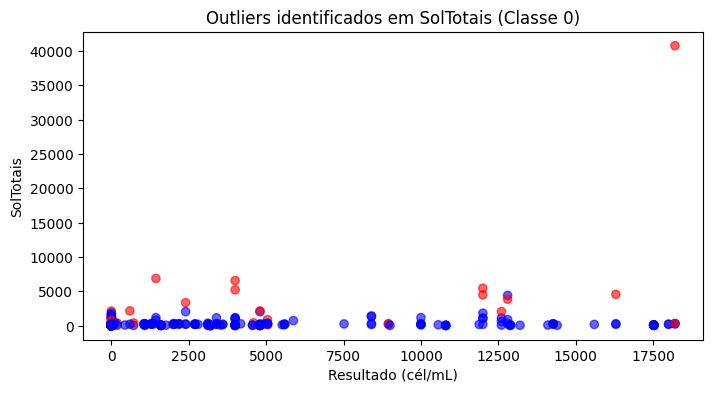

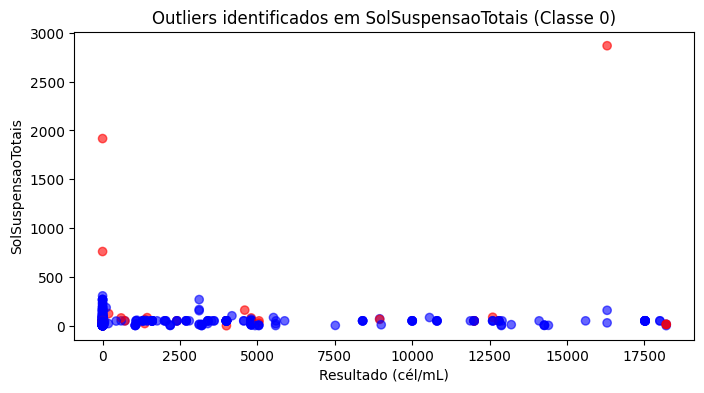

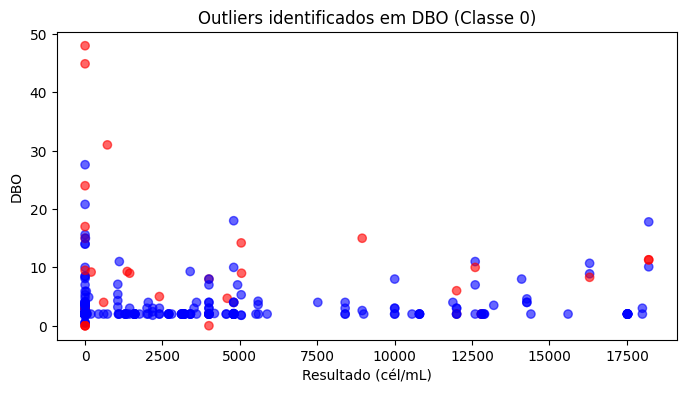

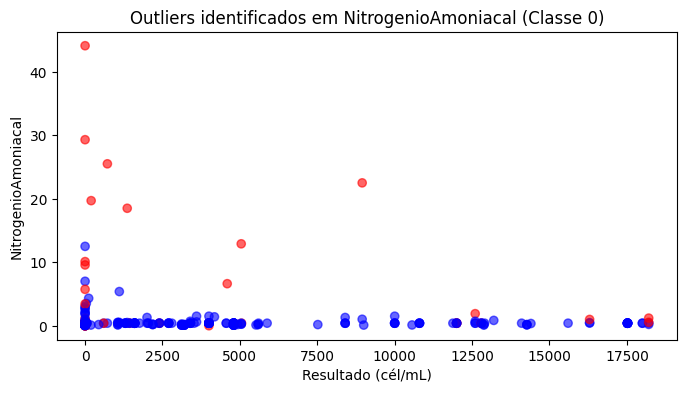

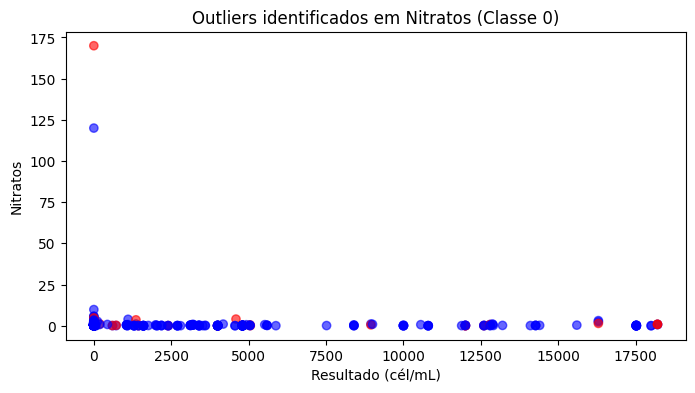

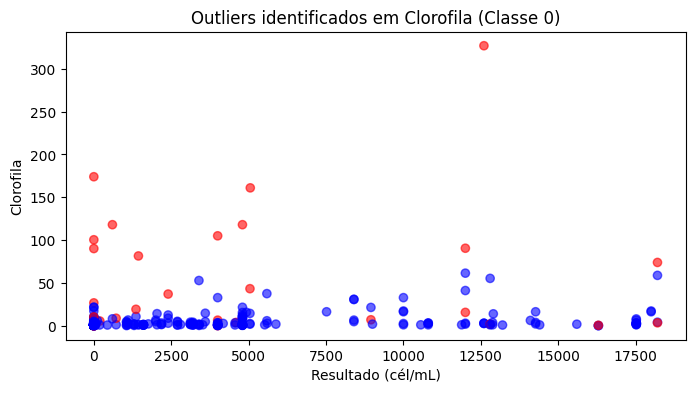

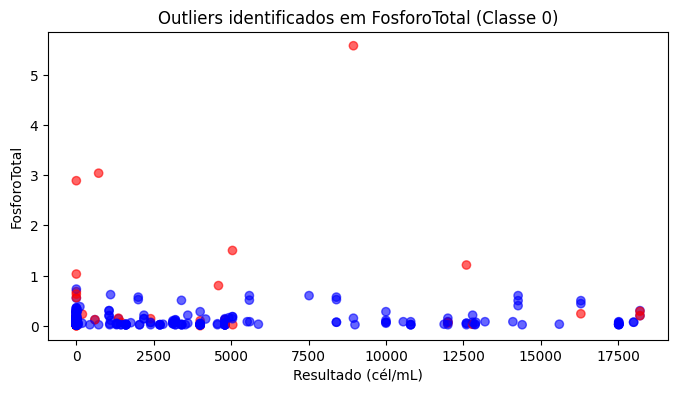

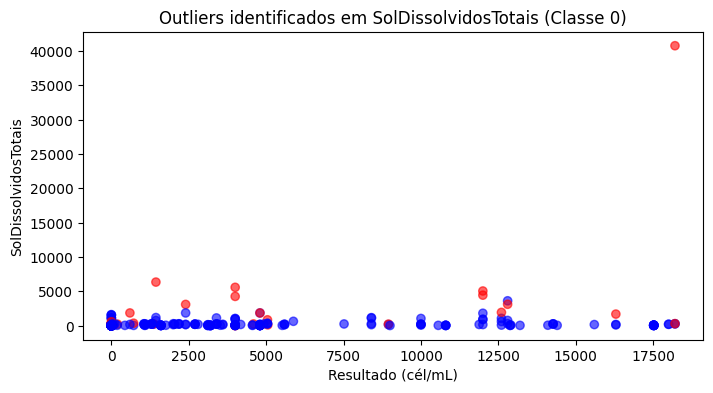

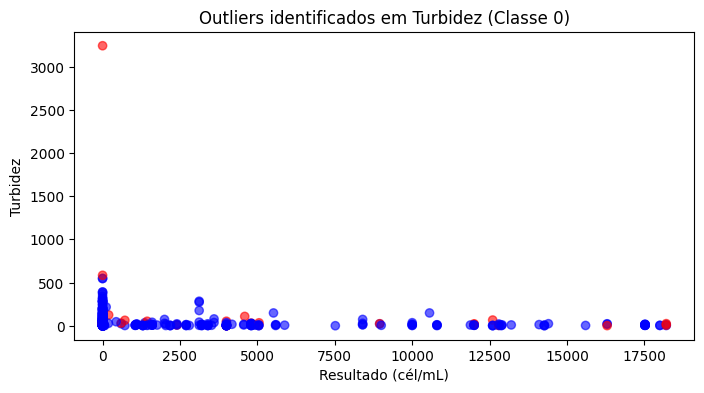

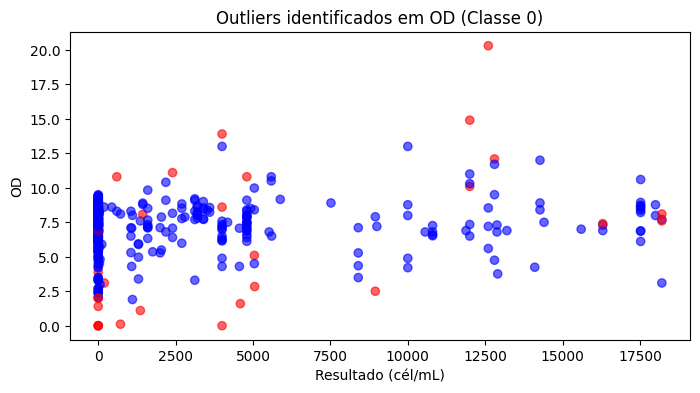

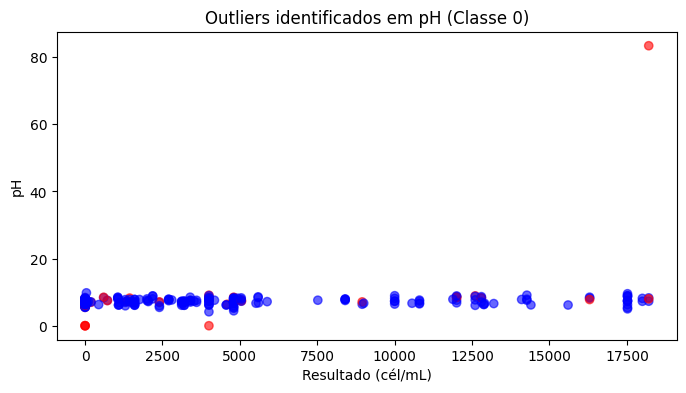

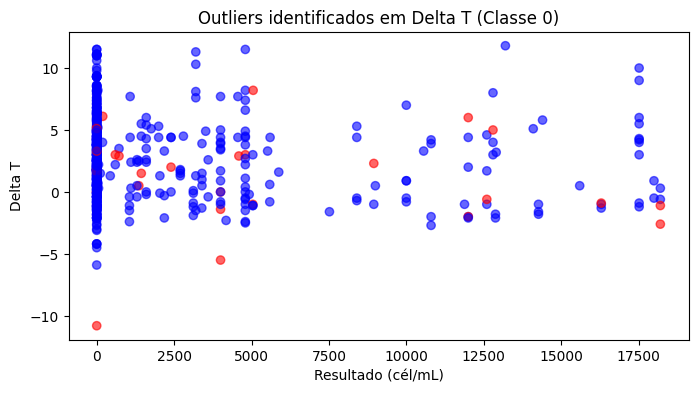

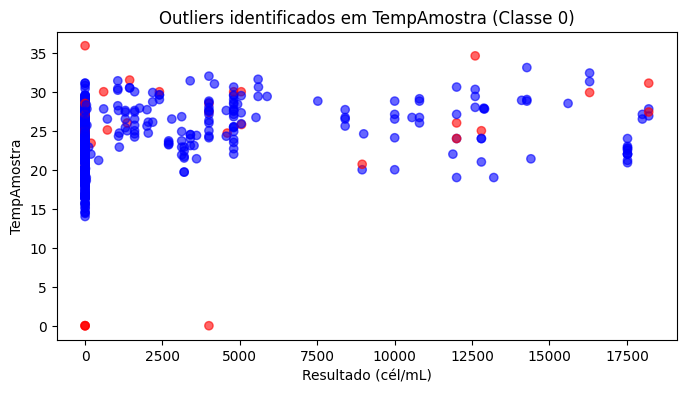

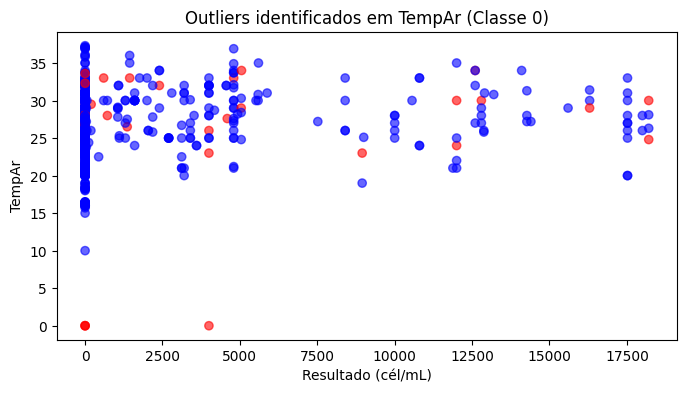

In [32]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 0
df_class_0 = df_aphanocapsa_50_c0_dropado[df_aphanocapsa_50_c0_dropado['Classe'] == 0]

# Selecionar apenas colunas numéricas, excluindo as colunas binárias
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado','Choveu']
numeric_columns = [col for col in df_class_0.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 0
isolation_forest.fit(df_class_0[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_0[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_0['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_0_cleaned = df_class_0[df_class_0['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_0)}")
print(f"Linhas após a remoção de outliers: {len(df_class_0_cleaned)}")

# Visualizar outliers para cada coluna numérica (exceto as binárias)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        df_class_0['Resultado'],
        df_class_0[col],
        c=['red' if outlier == -1 else 'blue' for outlier in df_class_0['Outlier']],
        alpha=0.6
    )
    plt.title(f"Outliers identificados em {col} (Classe 0)")
    plt.ylabel(col)
    plt.xlabel("Resultado (cél/mL)")
    plt.show()

In [35]:
df_class_1['Resultado'].min()

20000.0

Linhas antes da remoção: 291
Linhas após a remoção de outliers: 276


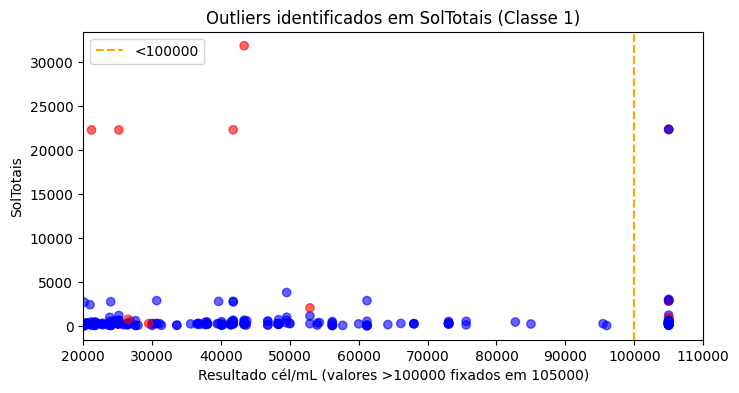

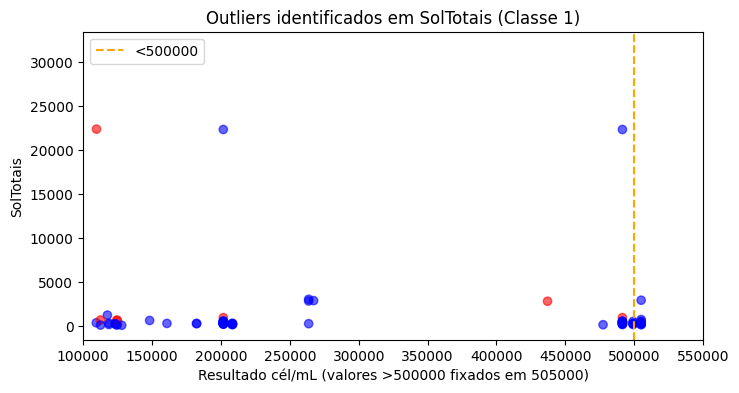

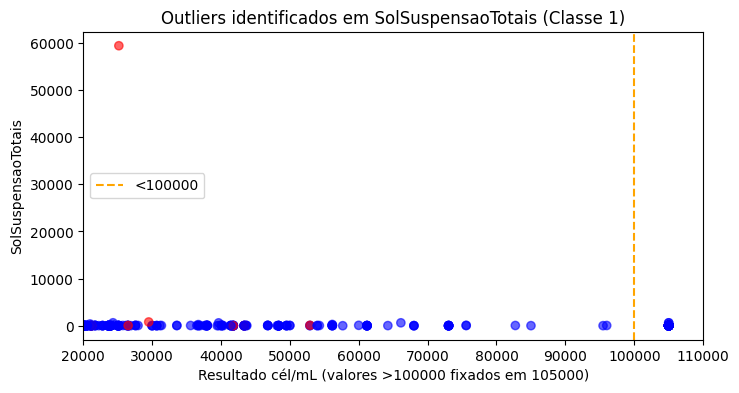

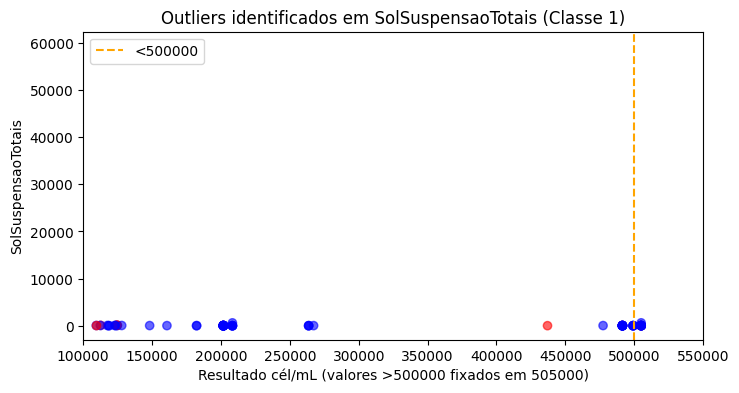

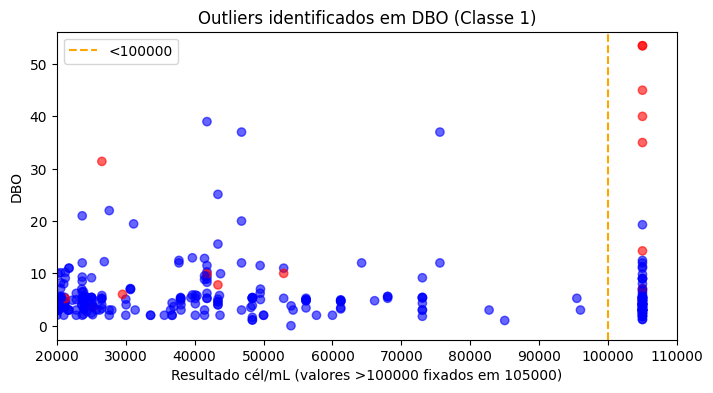

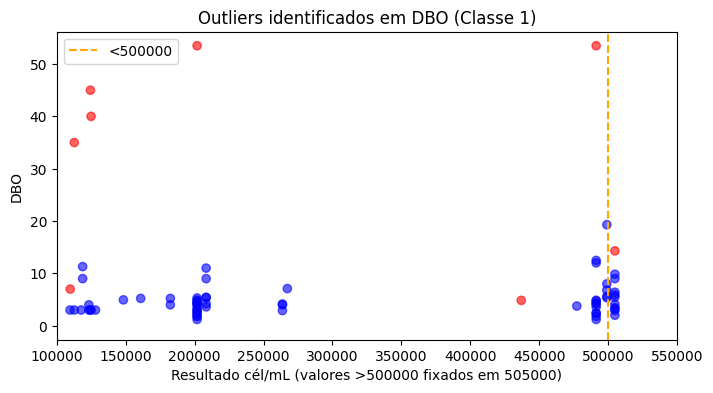

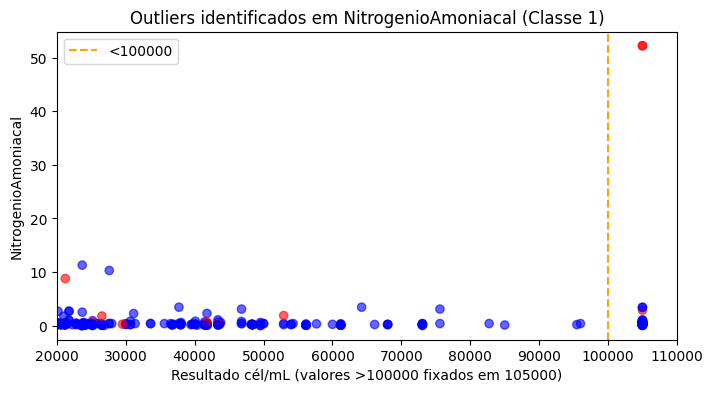

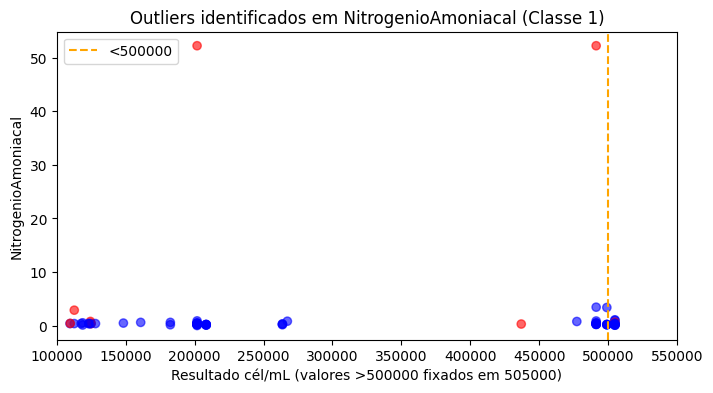

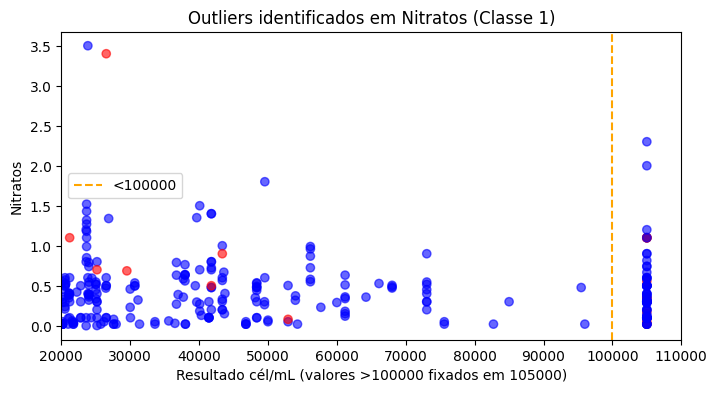

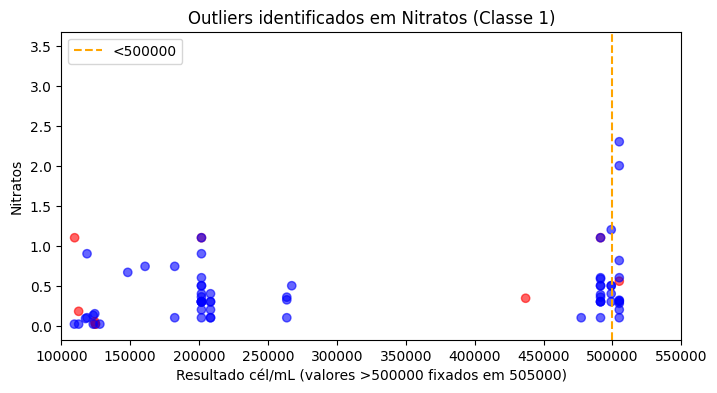

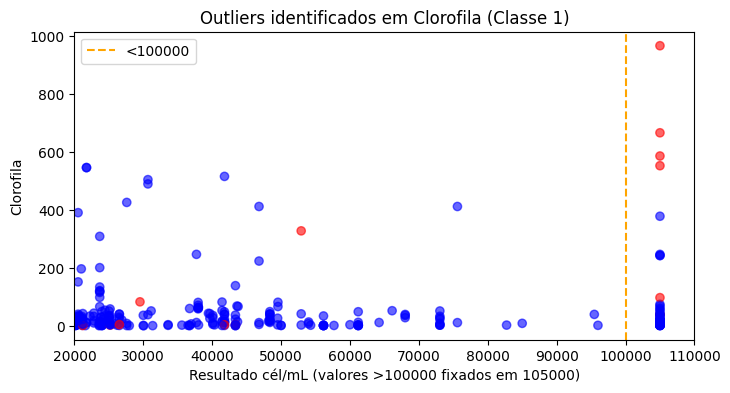

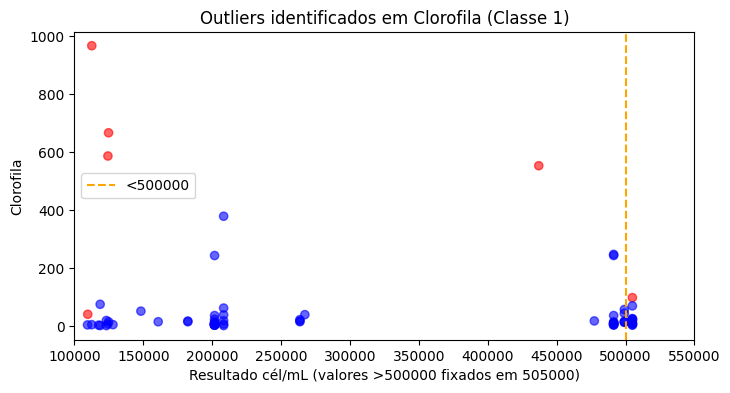

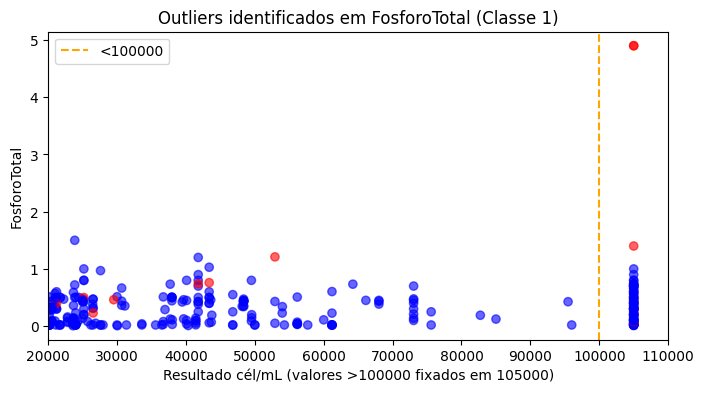

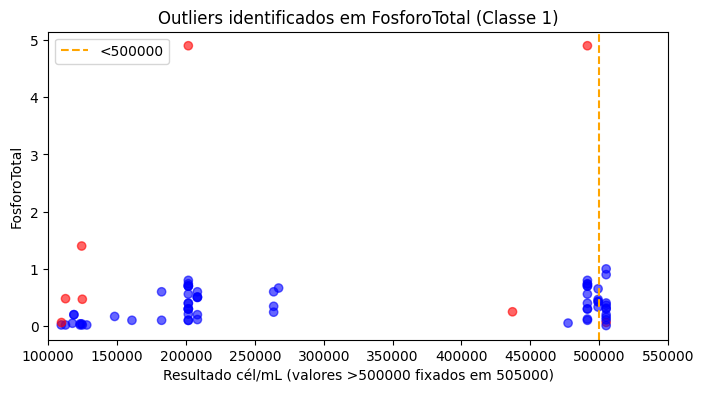

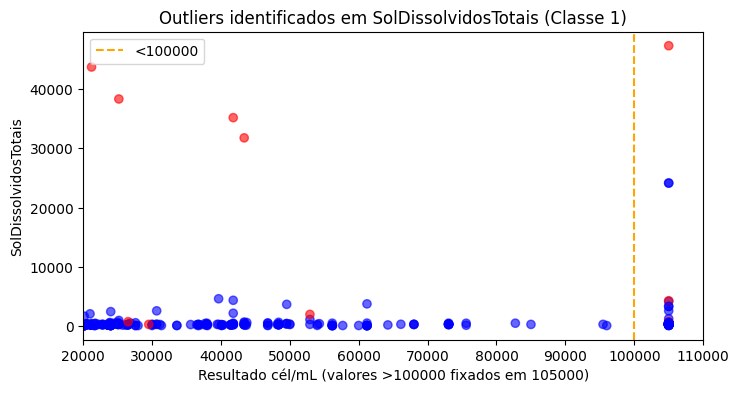

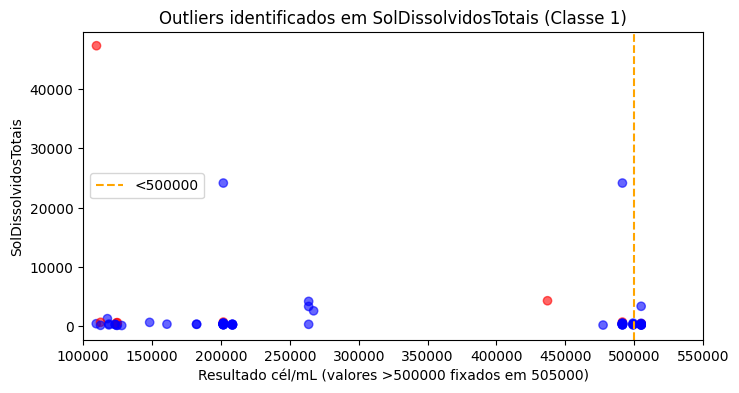

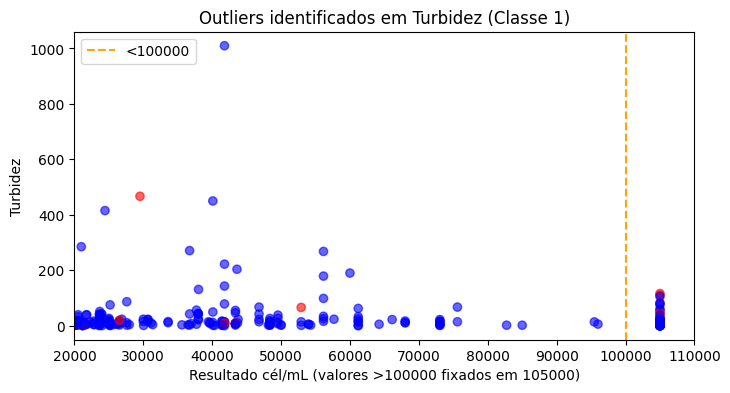

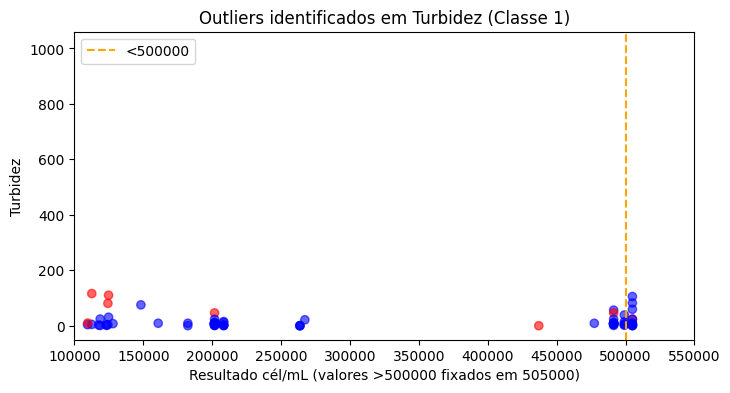

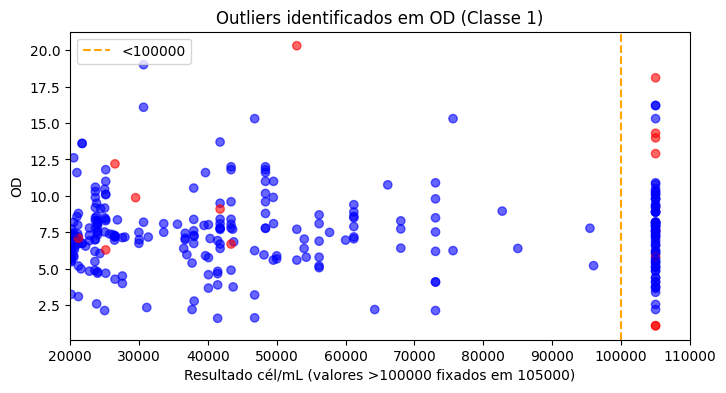

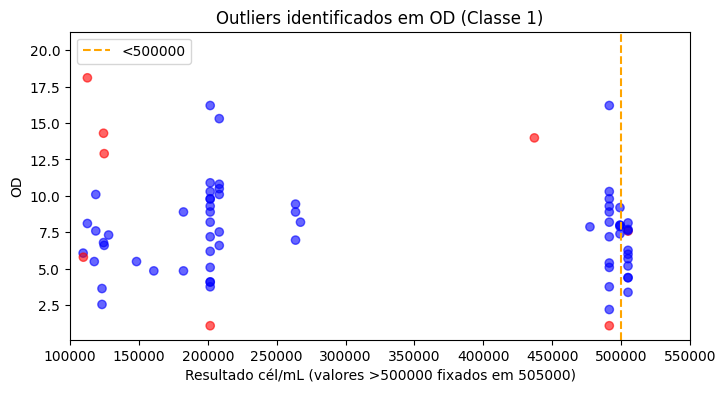

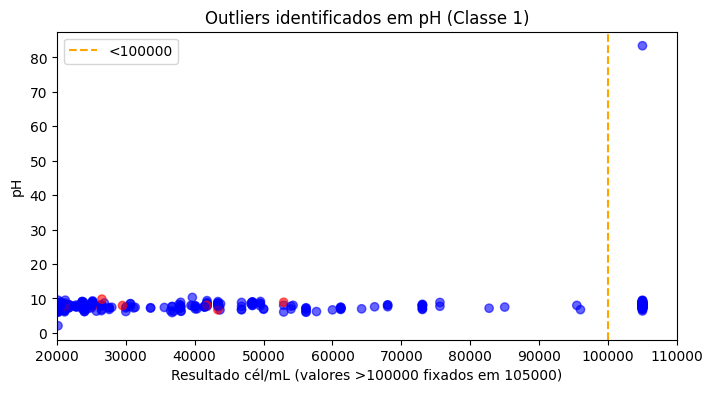

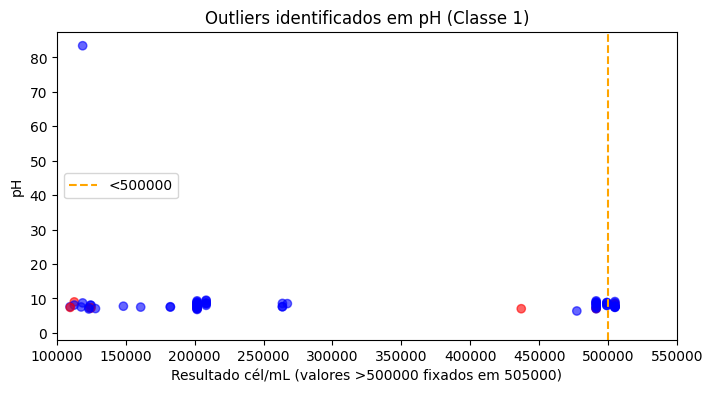

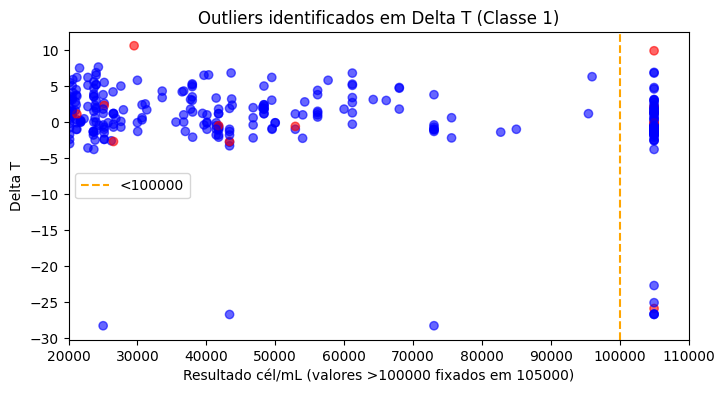

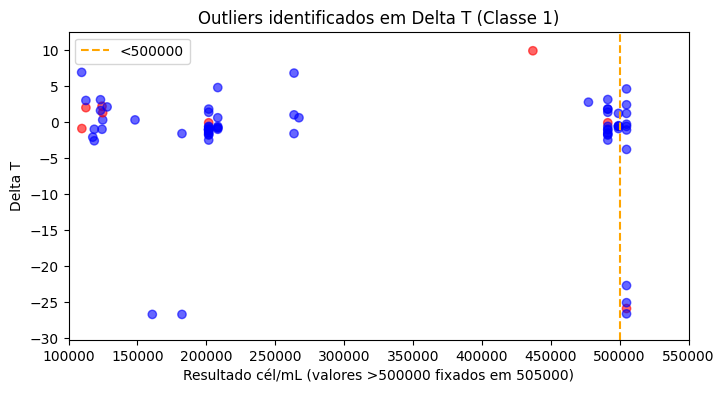

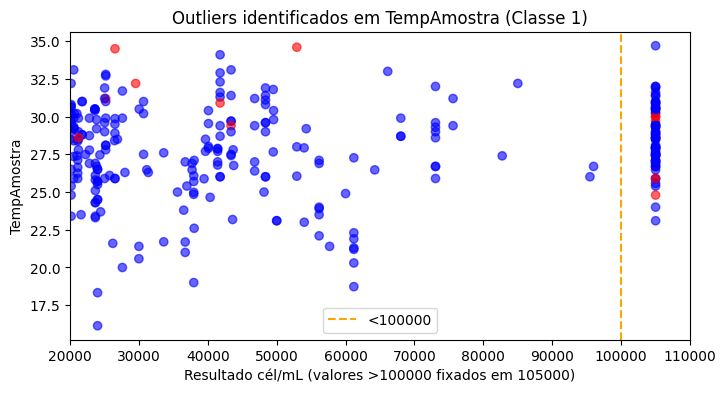

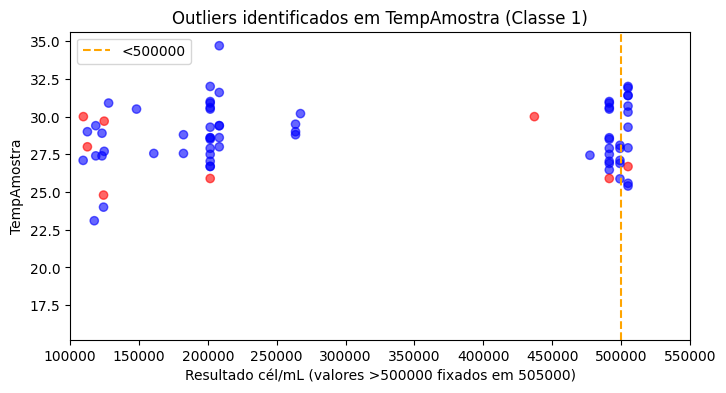

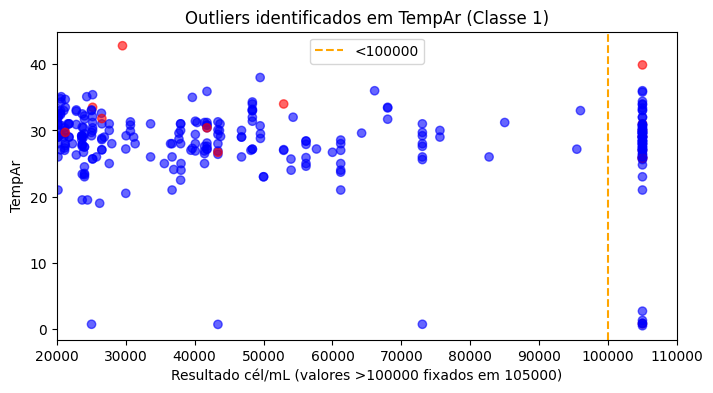

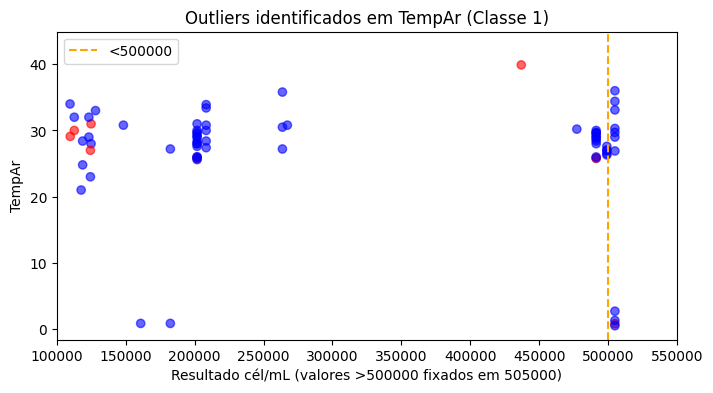

In [42]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 1
df_class_1 = df_aphanocapsa_50_c1[df_aphanocapsa_50_c1['Classe'] == 1]

# Selecionar apenas colunas numéricas, excluindo as colunas irrelevantes
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado']
numeric_columns = [col for col in df_class_1.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 1
isolation_forest.fit(df_class_1[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_1[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_1['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_1_cleaned = df_class_1[df_class_1['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_1)}")
print(f"Linhas após a remoção de outliers: {len(df_class_1_cleaned)}")


# Visualizar outliers para cada coluna numérica (exceto as excluídas)
for col in numeric_columns:
    for value_resultado in [[20000, 100000],[100000, 500000]]:
      # Ajustar os valores de "Resultado" para o gráfico
      df_class_1['Resultado Ajustado'] = np.where(
          df_class_1['Resultado'] > value_resultado[1], value_resultado[1]+5000, df_class_1['Resultado']
      )

      plt.figure(figsize=(8, 4))
      plt.scatter(
          df_class_1['Resultado Ajustado'],  # Usar a coluna ajustada
          df_class_1[col],
          c=['red' if outlier == -1 else 'blue' for outlier in df_class_1['Outlier']],
          alpha=0.6
      )
      plt.title(f"Outliers identificados em {col} (Classe 1)")
      plt.ylabel(col)
      plt.xlim(value_resultado[0], value_resultado[1]+10000 if value_resultado[1]==100000 else value_resultado[1]+50000)
      plt.xlabel(f"Resultado cél/mL (valores >{value_resultado[1]} fixados em {value_resultado[1]+5000})")
      plt.axvline(value_resultado[1], color='orange', linestyle='--', label=f'<{value_resultado[1]}')  # Linha de referência
      plt.legend()
      plt.show()

In [43]:
  df_class_0_cleaned.describe()

,SolTotais,Choveu,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617.000,617,617.000,617.000,617.000,617.000,617.000,617.000
mean,157.290,0.089,32.944,2.559,0.293,0.851,2.913,0.078,126.413,34.627,7.410,6.944,2.697,24.101,26.797,1704.206,2019-01-10 14:39:52.220421376,0.000,0.112,0.073,0.374,0.441,1.000
min,22.000,0.000,1.000,0.500,0.023,0.020,0.010,0.016,11.000,0.230,1.900,4.150,-5.900,14.000,10.000,0.000,2016-10-05 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
25%,54.000,0.000,7.000,2.000,0.100,0.130,0.800,0.020,45.000,4.790,6.900,6.400,0.400,21.900,24.400,0.000,2018-08-23 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
50%,77.000,0.000,15.000,2.000,0.140,0.460,1.136,0.040,59.000,9.110,7.500,6.900,2.500,24.500,27.000,0.000,2018-11-21 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
75%,153.000,0.000,50.000,2.000,0.400,0.890,2.503,0.080,93.000,23.000,8.200,7.300,4.500,26.700,30.000,1057.000,2019-09-19 00:00:00,0.000,0.000,0.000,1.000,1.000,1.000
max,4410.000,1.000,306.000,27.600,12.500,120.000,61.400,0.730,3627.000,547.000,13.000,9.800,11.800,33.100,37.300,18205.000,2022-06-07 00:00:00,0.000,1.000,1.000,1.000,1.000,1.000
std,300.846,0.285,43.730,2.228,0.697,4.872,6.229,0.100,269.302,68.786,1.373,0.686,3.154,3.618,4.286,3947.975,NaN,0.000,0.315,0.260,0.484,0.497,0.000


In [44]:
df_class_1_cleaned.describe()

,SolTotais,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276.000,276,276.000,276.000,276.000,276.000,276.000,276.000
mean,562.390,40.557,5.745,0.507,0.425,44.138,0.303,547.464,28.597,7.474,8.034,0.389,27.731,28.105,121935.279,2018-11-06 17:39:07.826086912,1.000,0.243,0.293,0.239,0.225,1.000
min,29.000,0.400,0.000,0.000,0.000,0.100,0.007,24.000,0.000,1.610,2.080,-28.280,16.140,0.500,20000.000,2016-10-04 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
25%,170.623,11.600,3.000,0.200,0.100,3.541,0.053,153.500,4.050,5.907,7.247,-1.000,26.073,27.000,24413.250,2018-03-13 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
50%,257.564,20.903,4.758,0.272,0.357,13.850,0.295,239.222,10.150,7.330,7.800,0.800,27.900,29.000,41785.000,2018-06-18 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
75%,362.313,50.000,5.770,0.400,0.546,39.037,0.469,302.000,22.925,8.500,8.400,2.955,29.878,31.000,77384.250,2019-04-03 12:00:00,1.000,0.000,1.000,0.000,0.000,1.000
max,22288.410,626.391,39.000,11.300,3.500,545.000,1.500,24136.000,1010.000,19.000,83.400,7.640,34.700,38.000,1684671.000,2023-11-22 00:00:00,1.000,1.000,1.000,1.000,1.000,1.000
std,1948.980,86.687,4.921,1.056,0.409,93.172,0.264,2122.853,79.590,2.643,4.638,5.281,3.027,5.663,227459.559,NaN,0.000,0.430,0.456,0.427,0.418,0.000


In [45]:
df_class_0_cleaned = df_class_0_cleaned.drop('Choveu', axis=1)

In [46]:
df_aphanocapsa_0e1 = pd.concat([df_class_0_cleaned,df_class_1_cleaned])
df_aphanocapsa_0e1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, 12 to 16
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolTotais                           893 non-null    float64       
 1   SolSuspensaoTotais                  893 non-null    float64       
 2   DBO                                 893 non-null    float64       
 3   NitrogenioAmoniacal                 893 non-null    float64       
 4   Nitratos                            893 non-null    float64       
 5   Clorofila                           893 non-null    float64       
 6   FosforoTotal                        893 non-null    float64       
 7   SolDissolvidosTotais                893 non-null    float64       
 8   Turbidez                            893 non-null    float64       
 9   OD                                  893 non-null    float64       
 10  pH                             

In [48]:
df_aphanocapsa_0e1.to_csv('/content/drive/MyDrive/RESULTADOS MERGE 2/REMOVENDO NaN C0 E RFRegressor VALORES C1 (ELIMINANDO OUTLIERS COM ISOLATION FOREST)/APHANOCAPSA sp./Cópia de DF-BASE_aphanocapsa.csv', index=False)